In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/My Drive/0320 - Credit Scoring Book demo/Data"
# mount vào google drive thư mục có chứa data

Mounted at /content/gdrive


In [2]:
import os
path = "gdrive/My Drive/0320 - Credit Scoring Book demo/Data"
print(os.path.isdir(path))
print(os.path.isfile(path + "/german_credit.csv"))
print(os.path.isfile(path + "/german_credit_categori.csv"))
# kiểm tra xem đường dẫn có tồn tại hay không

True
True
True


# **2-class classification**
- **0: Không có rủi ro (Tốt)**
- **1: Có rủi ro (Xấu)**






### **1. Import dữ liệu**

In [3]:
import pandas as pd #thư viện làm việc với data frame
import seaborn as sns #vẽ hình
import numpy as np # thư viện làm việc với con số
import matplotlib.pyplot as plt #vẽ hình

data = pd.read_csv(path + "/german_credit.csv") # đọc dữ liệu từ đương dẫn phía trên
 # .read_csv
 # .read_excel

In [4]:
data

default  account_check_status  duration_in_month  credit_history  \
0          0                     1                  6               4   
1          1                     2                 48               2   
2          0                     4                 12               4   
3          0                     1                 42               2   
4          1                     1                 24               3   
..       ...                   ...                ...             ...   
995        0                     4                 12               2   
996        0                     1                 30               2   
997        0                     4                 12               2   
998        1                     1                 45               2   
999        0                     2                 45               4   

     purpose  credit_amount  savings  present_emp_since  \
0          4           1169        5                  5   
1          4           5951        1                  3   
2          7           2096        1                  4   
3          3           7882        1                  4   
4          0           4870        1                  3   
..       ...            ...      ...                ...   
995        3           1736        1                  4   
996        1           3857        1                  3   
997        4            804        1                  5   
998        4           1845        1                  3   
999        1           4576        2                  1   

     installment_as_income_perc  personal_status_sex  ...  present_res_since  \
0                             4                    3  ...                  4   
1                             2                    2  ...                  2   
2                             2                    3  ...                  3   
3                             2                    3  ...                  4   
4                             3                    3  ...                  4   
..                          ...                  ...  ...                ...   
995                           3                    2  ...                  4   
996                           4                    1  ...                  4   
997                           4                    3  ...                  4   
998                           4                    3  ...                  4   
999                           3                    3  ...                  4   

     property  age  other_installment_plans  housing  credits_this_bank  job  \
0           1   67                        3        2                  2    3   
1           1   22                        3        2                  1    3   
2           1   49                        3        2                  1    2   
3           2   45                        3        3                  1    3   
4           4   53                        3        3                  2    3   
..        ...  ...                      ...      ...                ...  ...   
995         1   31                        3        2                  1    2   
996         2   40                        3        2                  1    4   
997         3   38                        3        2                  1    3   
998         4   23                        3        3                  1    3   
999         3   27                        3        2                  1    3   

     people_under_maintenance  telephone  foreign_worker  
0                           1          2               1  
1                           1          1               1  
2                           2          1               1  
3                           2          1               1  
4                           2          1               1  
..                        ...        ...             ...  
995                         1          1               1  
996                      

### **2. Thống kê mô tả**

In [5]:
from copy import deepcopy
data_2 = deepcopy(data) 

In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

In [7]:
numerical_features = ['duration_in_month', 'credit_amount', 'installment_as_income_perc', 'present_res_since',
                        'age', 'credits_this_bank', 'people_under_maintenance']
print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  7


In [8]:
categorical_features = [x for x in data.columns if (x not in numerical_features and x != 'default')]
print('Number of numerical features: ', len(categorical_features))

Number of numerical features:  13


In [9]:
for col in categorical_features:
    data_2[col] = data_2[col].astype('object')

In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [11]:
data_2[numerical_features].describe()

duration_in_month  credit_amount  installment_as_income_perc  \
count        1000.000000    1000.000000                 1000.000000   
mean           20.903000    3271.258000                    2.973000   
std            12.058814    2822.736876                    1.118715   
min             4.000000     250.000000                    1.000000   
25%            12.000000    1365.500000                    2.000000   
50%            18.000000    2319.500000                    3.000000   
75%            24.000000    3972.250000                    4.000000   
max            72.000000   18424.000000                    4.000000   

       present_res_since          age  credits_this_bank  \
count        1000.000000  1000.000000        1000.000000   
mean            2.845000    35.546000           1.407000   
std             1.103718    11.375469           0.577654   
min             1.000000    19.000000           1.000000   
25%             2.000000    27.000000           1.000000   
50%             3.000000    33.000000           1.000000   
75%             4.000000    42.000000           2.000000   
max             4.000000    75.000000           4.000000   

       people_under_maintenance  
count               1000.000000  
mean                   1.155000  
std                    0.362086  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%                    1.000000  
max                    2.000000

In [12]:
data_2[categorical_features].describe()

account_check_status  credit_history  purpose  savings  \
count                   1000            1000     1000     1000   
unique                     4               5       10        5   
top                        4               2        4        1   
freq                     394             530      280      603   

        present_emp_since  personal_status_sex  other_debtors  property  \
count                1000                 1000           1000      1000   
unique                  5                    4              3         4   
top                     3                    3              1         3   
freq                  339                  548            907       332   

        other_installment_plans  housing   job  telephone  foreign_worker  
count                      1000     1000  1000       1000            1000  
unique                        3        3     4          2               2  
top                           3        2     3          1               1  
freq                        814      713   630        596             963

### **3. Correlation**

In [13]:
data.corr()

default  account_check_status  duration_in_month  \
default                     1.000000             -0.350847           0.214927   
account_check_status       -0.350847              1.000000          -0.072013   
duration_in_month           0.214927             -0.072013           1.000000   
credit_history             -0.228785              0.192191          -0.077186   
purpose                     0.001514              0.053223           0.096027   
credit_amount               0.154739             -0.042705           0.624984   
savings                    -0.178943              0.222867           0.047661   
present_emp_since          -0.116002              0.106339           0.057381   
installment_as_income_perc  0.072404             -0.005280           0.074749   
personal_status_sex        -0.088184              0.043261           0.014789   
other_debtors              -0.025137             -0.127737          -0.024490   
present_res_since           0.002967             -0.042234           0.034067   
property                    0.142612             -0.032260           0.303971   
age                        -0.091127              0.059751          -0.036136   
other_installment_plans    -0.109844              0.046841          -0.054884   
housing                    -0.019315              0.022424           0.157049   
credits_this_bank          -0.045732              0.076005          -0.011284   
job                         0.032735              0.040663           0.210910   
people_under_maintenance   -0.003015             -0.014145          -0.023834   
telephone                  -0.036466              0.066296           0.164718   
foreign_worker             -0.082079             -0.026758          -0.138196   

                            credit_history   purpose  credit_amount   savings  \
default                          -0.228785  0.001514       0.154739 -0.178943   
account_check_status              0.192191  0.053223      -0.042705  0.222867   
duration_in_month                -0.077186  0.096027       0.624984  0.047661   
credit_history                    1.000000 -0.081634      -0.059905  0.039058   
purpose                          -0.081634  1.000000      -0.030848 -0.024072   
credit_amount                    -0.059905 -0.030848       1.000000  0.064630   
savings                           0.039058 -0.024072       0.064630  1.000000   
present_emp_since                 0.138225  0.024990      -0.008367  0.120950   
installment_as_income_perc        0.044375  0.078224      -0.271316  0.021993   
personal_status_sex               0.042171 -0.003052      -0.016091  0.017349   
other_debtors                    -0.040676 -0.032254      -0.027832 -0.105069   
present_res_since                 0.063198 -0.062927       0.028926  0.091424   
property                         -0.053777 -0.031025       0.311599  0.018948   
age                               0.147086 -0.030654       0.032716  0.084245   
other_installment_plans           0.121973 -0.039346      -0.046008  0.001908   
housing                           0.062095 -0.019488       0.135632  0.006505   
credits_this_bank                 0.437066  0.034958       0.020795 -0.021644   
job                               0.010350 -0.032655       0.285385  0.011709   
people_under_maintenance          0.011550 -0.056450       0.017142  0.027514   
telephone                         0.052370  0.018677       0.276995  0.087208   
foreign_worker                    0.013873 -0.124317      -0.050050  0.007095   

                            present_emp_since  installment_as_income_perc  \
default                             -0.116002                    0.072404   
account_check_status                 0.106339                   -0.005280   
duration_in_month                    0.057381                    0.074749   
credit_history                       0.138225                    0.044375   
purpose                              0.024990                    0.078224   
c

In [14]:
pd.DataFrame(data.corr().iloc[1:,0])

default
account_check_status       -0.350847
duration_in_month           0.214927
credit_history             -0.228785
purpose                     0.001514
credit_amount               0.154739
savings                    -0.178943
present_emp_since          -0.116002
installment_as_income_perc  0.072404
personal_status_sex        -0.088184
other_debtors              -0.025137
present_res_since           0.002967
property                    0.142612
age                        -0.091127
other_installment_plans    -0.109844
housing                    -0.019315
credits_this_bank          -0.045732
job                         0.032735
people_under_maintenance   -0.003015
telephone                  -0.036466
foreign_worker             -0.082079

In [15]:
correlation = data.corr().iloc[1:,0].values
# np.absolute(correlation)

In [16]:
column_selected = [x for x in data.columns if (x != 'default')]
column_selected

['account_check_status',
 'duration_in_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'foreign_worker']

In [17]:
features_importances_corr = pd.DataFrame({'FeatureName': data[column_selected].columns[0:len(data[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

FeatureName  Pearson Correlation with target
0         account_check_status                        -0.350847
2               credit_history                        -0.228785
1            duration_in_month                         0.214927
5                      savings                        -0.178943
4                credit_amount                         0.154739
11                    property                         0.142612
6            present_emp_since                        -0.116002
13     other_installment_plans                        -0.109844
12                         age                        -0.091127
8          personal_status_sex                        -0.088184
19              foreign_worker                        -0.082079
7   installment_as_income_perc                         0.072404
15           credits_this_bank                        -0.045732
18                   telephone                        -0.036466
16                         job                         0.032735
9                other_debtors                        -0.025137
14                     housing                        -0.019315
17    people_under_maintenance                        -0.003015
10           present_res_since                         0.002967
3                      purpose                         0.001514

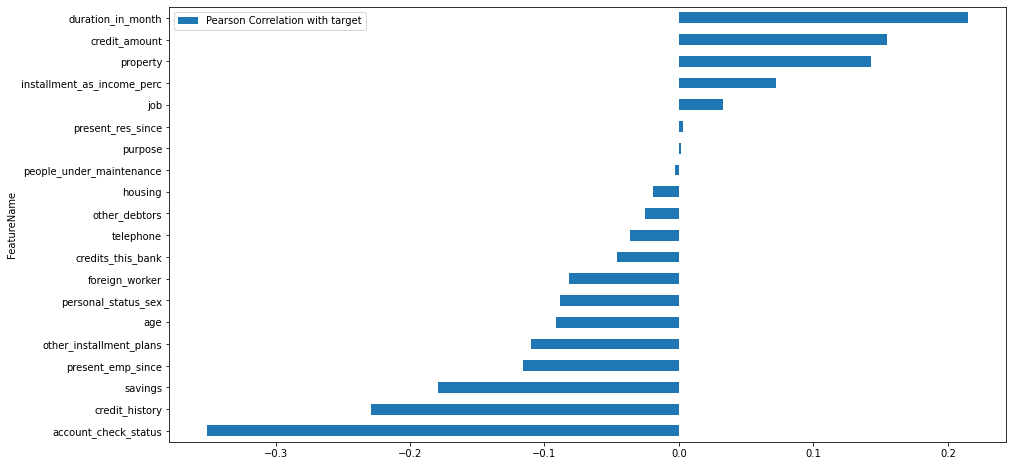

In [18]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

In [19]:
from sklearn.metrics import roc_curve, auc

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

### **4. Random Forest Feature Importance**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [21]:
target = ['default']
features = list(set(list(data.columns)) - set(target))

In [22]:
print('Target: ', target)
print('Features: ', features)

Target:  ['default']
Features:  ['people_under_maintenance', 'duration_in_month', 'personal_status_sex', 'other_debtors', 'age', 'purpose', 'telephone', 'credit_history', 'installment_as_income_perc', 'foreign_worker', 'credit_amount', 'credits_this_bank', 'job', 'present_res_since', 'savings', 'other_installment_plans', 'account_check_status', 'housing', 'property', 'present_emp_since']


In [23]:
X = data[features].values
y = data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

***a. Prediction***

In [24]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[64  7]
 [12 17]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        71
           1       0.71      0.59      0.64        29

    accuracy                           0.81       100
   macro avg       0.78      0.74      0.76       100
weighted avg       0.80      0.81      0.80       100

Random Forest accuracy:  0.81


***b. Feature Importance***

In [25]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

FeatureName  Random Forest Feature Importance
10               other_debtors                          0.137938
4                      purpose                          0.109448
16           credits_this_bank                          0.101694
1         account_check_status                          0.092645
5                credit_amount                          0.064194
7            present_emp_since                          0.063179
19                   telephone                          0.050622
8   installment_as_income_perc                          0.045372
18    people_under_maintenance                          0.045265
14     other_installment_plans                          0.045074
13                         age                          0.042106
2            duration_in_month                          0.037408
12                    property                          0.031547
17                         job                          0.029485
15                     housing                          0.026366
11           present_res_since                          0.022452
3               credit_history                          0.019576
6                      savings                          0.018190
0                      default                          0.012968
9          personal_status_sex                          0.004474

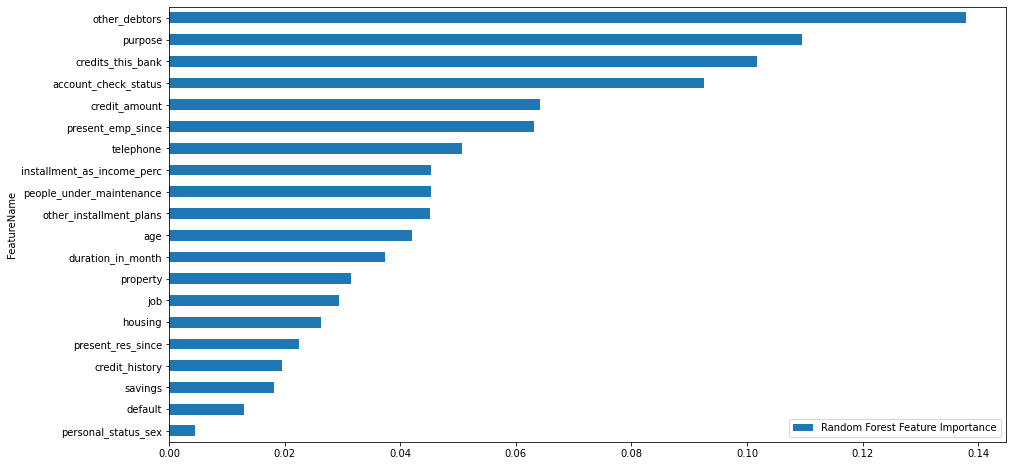

In [26]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

***c. ROC Curve***

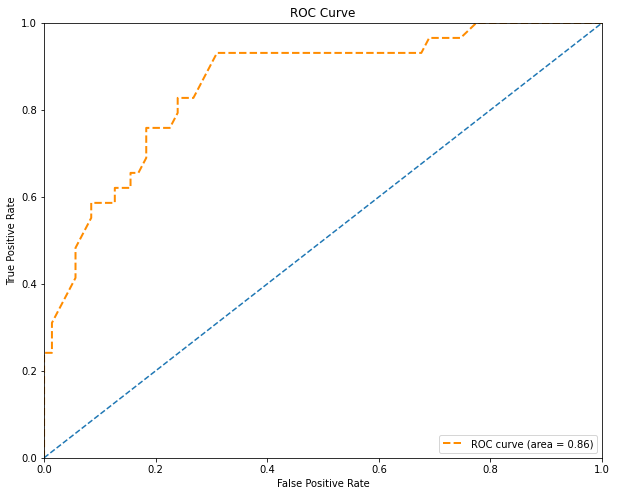

In [27]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

### **5. Using Logistic Regression to predict default**

***a. Prediction***

In [28]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train.ravel())

y_pred = LR_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[63  8]
 [14 15]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        71
           1       0.65      0.52      0.58        29

    accuracy                           0.78       100
   macro avg       0.74      0.70      0.71       100
weighted avg       0.77      0.78      0.77       100

Logistic Regression accuracy:  0.78


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
df_report = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':y_pred.ravel()})
df_report

Ground Truth  Prediction
0              1           0
1              0           1
2              0           1
3              0           0
4              0           0
..           ...         ...
95             0           0
96             0           0
97             0           1
98             1           1
99             1           0

[100 rows x 2 columns]

In [30]:
df_report.to_excel(r'gdrive/My Drive/0320 - Credit Scoring Book demo/predicted.xlsx', index=False)

***b. Feature Importance***

In [31]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

FeatureName  Logistic Regression Feature Importance
16           credits_this_bank                               -0.515614
7            present_emp_since                               -0.304219
8   installment_as_income_perc                                0.273954
14     other_installment_plans                               -0.232109
18    people_under_maintenance                                0.229465
13                         age                                0.117335
19                   telephone                               -0.077949
15                     housing                               -0.068986
12                    property                                0.068973
2            duration_in_month                               -0.065194
0                      default                                0.047482
6                      savings                               -0.033117
11           present_res_since                                0.032969
3               credit_history                               -0.030407
1         account_check_status                                0.024643
4                      purpose                               -0.013705
5                credit_amount                               -0.012494
17                         job                               -0.009835
9          personal_status_sex                               -0.000868
10               other_debtors                                0.000068

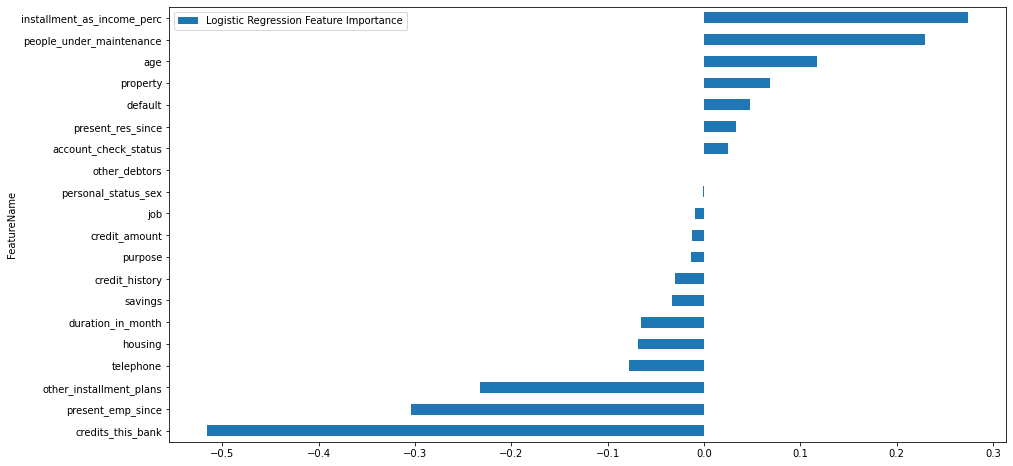

In [32]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

***c. ROC Curve***

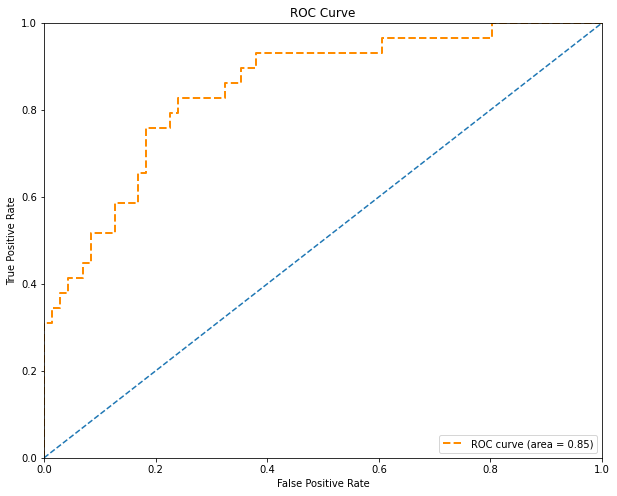

In [33]:
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

### **6. Decision Tree Classifier**

In [34]:
from sklearn.tree import DecisionTreeClassifier

***a. Prediction***

In [35]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[58 13]
 [14 15]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        71
           1       0.54      0.52      0.53        29

    accuracy                           0.73       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.73      0.73      0.73       100

Decision Tree accuracy:  0.73


***b. Feature Importance***

In [36]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

FeatureName  Decision Tree Feature Importance
10               other_debtors                          0.199054
16           credits_this_bank                          0.128860
4                      purpose                          0.121075
1         account_check_status                          0.105863
7            present_emp_since                          0.064173
19                   telephone                          0.047371
13                         age                          0.043957
5                credit_amount                          0.032351
8   installment_as_income_perc                          0.031921
18    people_under_maintenance                          0.029184
14     other_installment_plans                          0.028691
2            duration_in_month                          0.028047
3               credit_history                          0.024027
17                         job                          0.023698
15                     housing                          0.023481
12                    property                          0.022889
11           present_res_since                          0.017228
6                      savings                          0.014905
0                      default                          0.013225
9          personal_status_sex                          0.000000

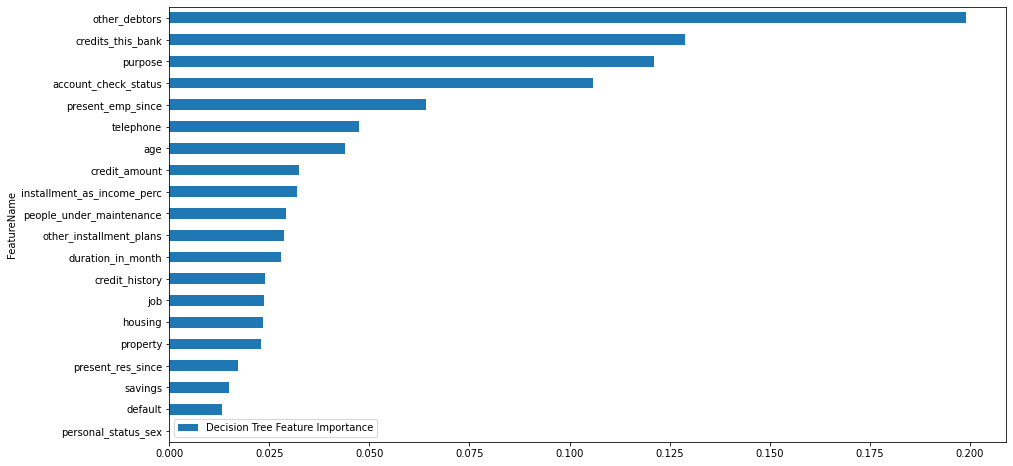

In [37]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

***c. ROC Curve***

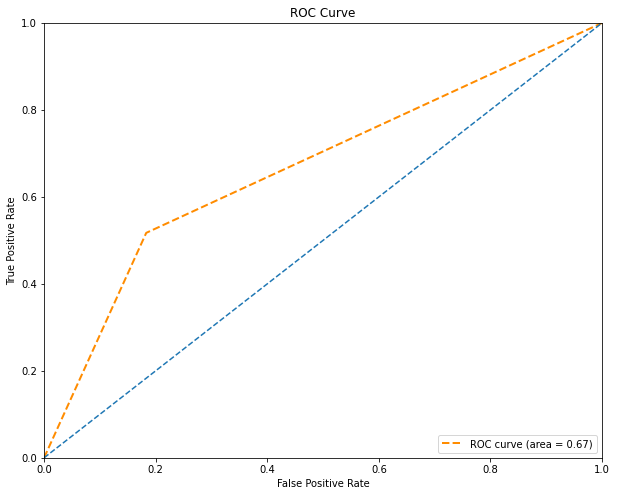

In [38]:
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

**d. Plot tree**

In [39]:
X_plot_tree = data[features]

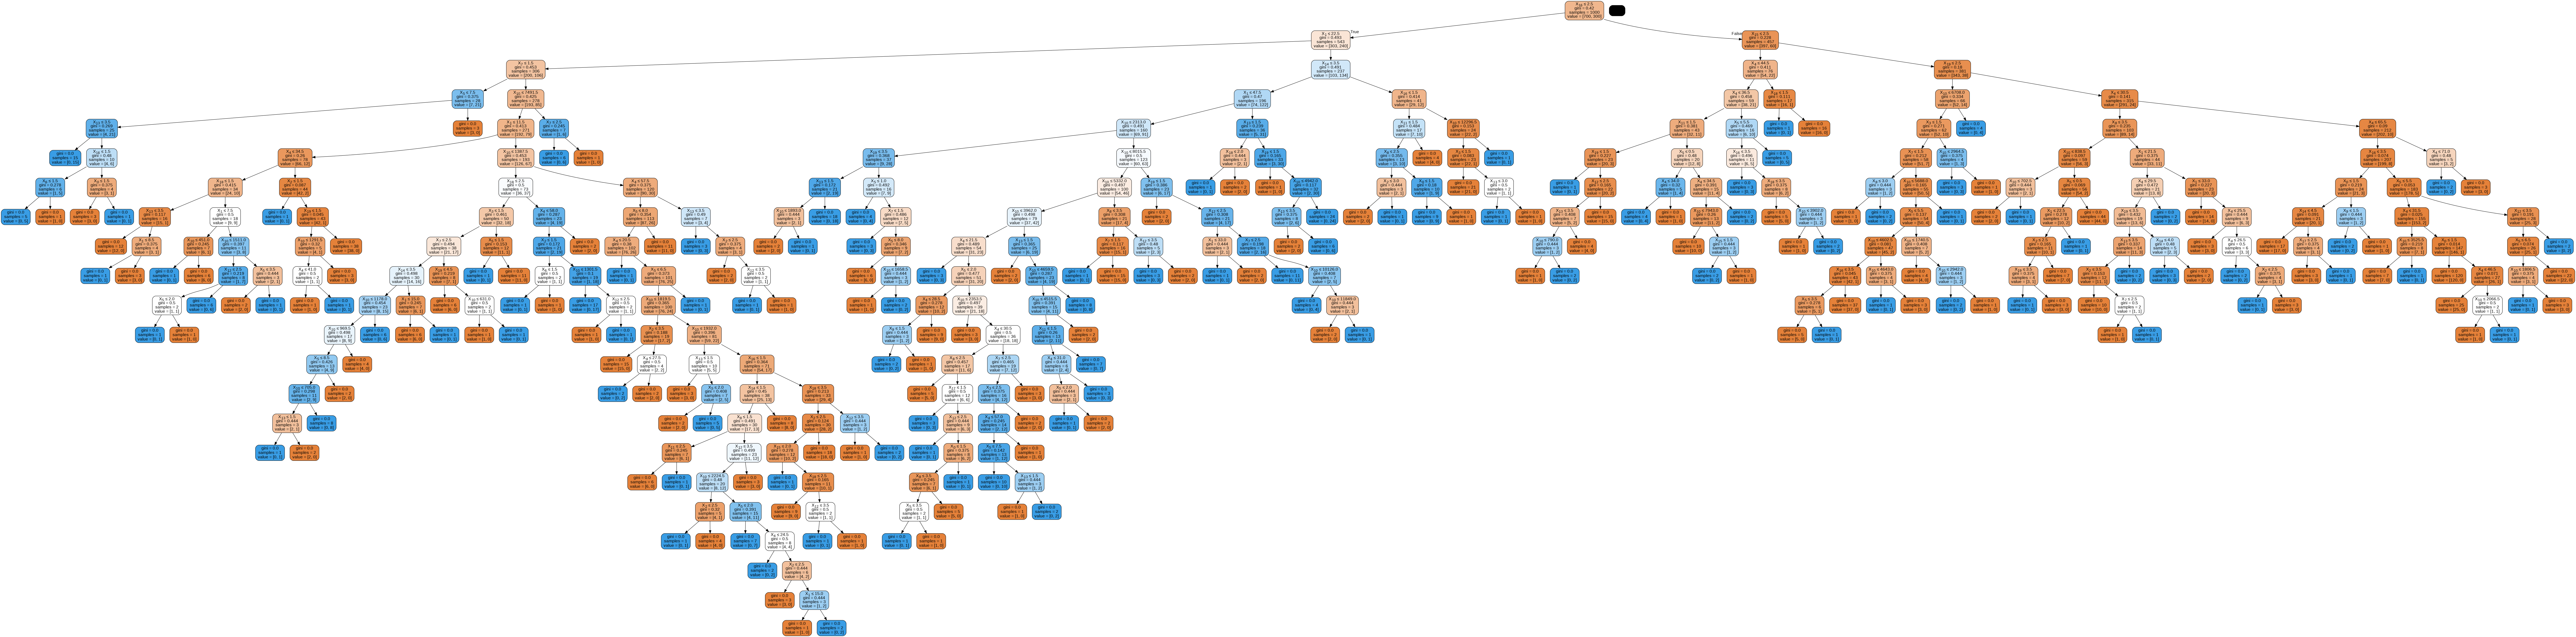

In [40]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

X_0: people_under_maintenance
X_1: duration_in_month
X_2: personal_status_sex
X_3: other_debtors
X_4: age
X_5: purpose
X_6: telephone
X_7: credit_history
X_8: installment_as_income_perc
X_9: foreign_worker
X_10: credit_amount
X_11: credits_this_bank
X_12: job
X_13: present_res_since
X_14: savings
X_15: other_installment_plans
X_16: account_check_status
X_17: housing
X_18: property
X_19: present_emp_since


### **7. XGB Classifier**

In [42]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

***a. Prediction***

In [43]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[61 10]
 [11 18]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        71
           1       0.64      0.62      0.63        29

    accuracy                           0.79       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.79      0.79      0.79       100

XGBoost accuracy:  0.79


***b. Feature Importance***

In [44]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

FeatureName  XGBoost Feature Importance
16           credits_this_bank                    0.204196
7            present_emp_since                    0.070670
3               credit_history                    0.064103
18    people_under_maintenance                    0.062391
14     other_installment_plans                    0.060462
1         account_check_status                    0.052110
19                   telephone                    0.048315
5                credit_amount                    0.044802
15                     housing                    0.044051
6                      savings                    0.042619
10               other_debtors                    0.041134
8   installment_as_income_perc                    0.038650
4                      purpose                    0.037307
13                         age                    0.036189
11           present_res_since                    0.035612
0                      default                    0.035233
2            duration_in_month                    0.027952
17                         job                    0.026582
9          personal_status_sex                    0.015509
12                    property                    0.012114

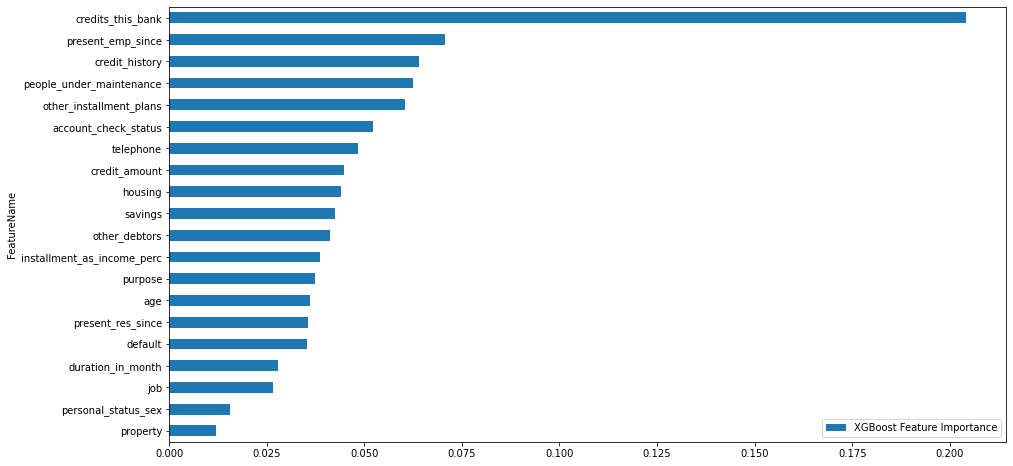

In [45]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

***c. ROC Curve***

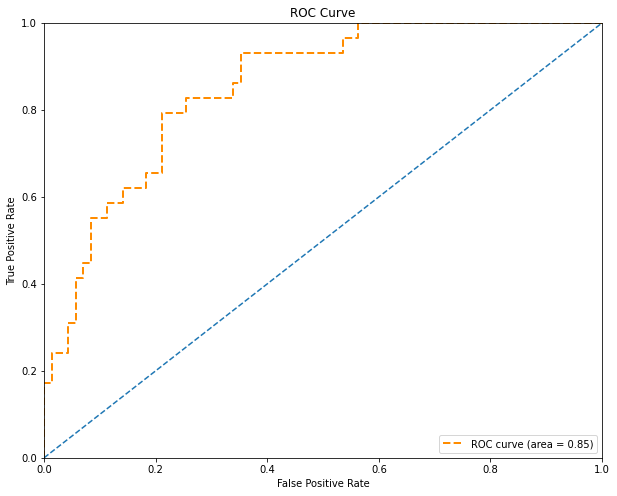

In [46]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

### **8. Ada Boost Classifier**

In [47]:
from sklearn.ensemble import AdaBoostClassifier

**a. Prediction**

In [48]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())

y_pred = ada_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[59 12]
 [14 15]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        71
           1       0.56      0.52      0.54        29

    accuracy                           0.74       100
   macro avg       0.68      0.67      0.68       100
weighted avg       0.73      0.74      0.74       100

XGBoost accuracy:  0.74


***b. Feature Importance***

In [49]:
importance_ada = ada_classifier.feature_importances_
features_importances_ada = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'AdaBoost Feature Importance': importance_ada})
features_importances_ada.sort_values(by=['AdaBoost Feature Importance'], ascending=False)

FeatureName  AdaBoost Feature Importance
10               other_debtors                         0.36
5                credit_amount                         0.10
16           credits_this_bank                         0.08
1         account_check_status                         0.08
2            duration_in_month                         0.04
18    people_under_maintenance                         0.04
7            present_emp_since                         0.04
14     other_installment_plans                         0.04
13                         age                         0.04
12                    property                         0.02
17                         job                         0.02
15                     housing                         0.02
19                   telephone                         0.02
11           present_res_since                         0.02
9          personal_status_sex                         0.02
8   installment_as_income_perc                         0.02
4                      purpose                         0.02
3               credit_history                         0.02
6                      savings                         0.00
0                      default                         0.00

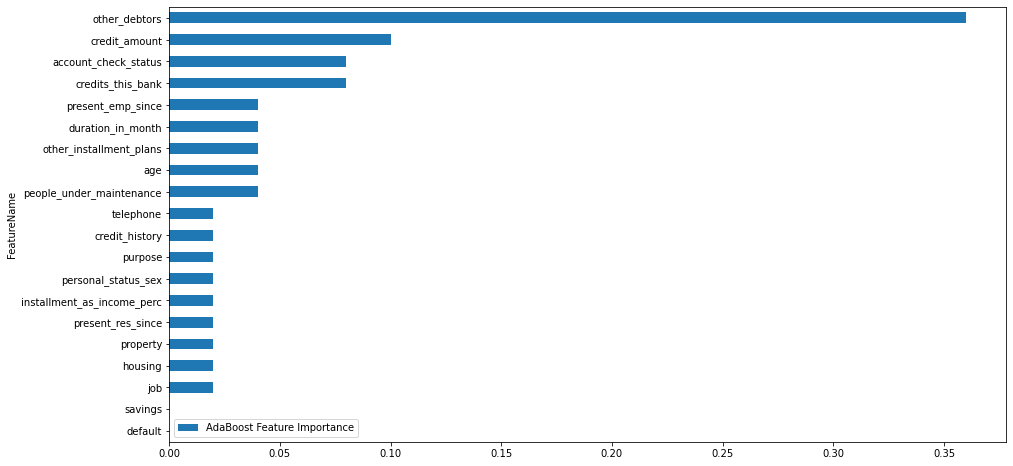

In [50]:
features_importances_ada.sort_values("AdaBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["AdaBoost Feature Importance"], kind="barh")

**c. ROC Curve**

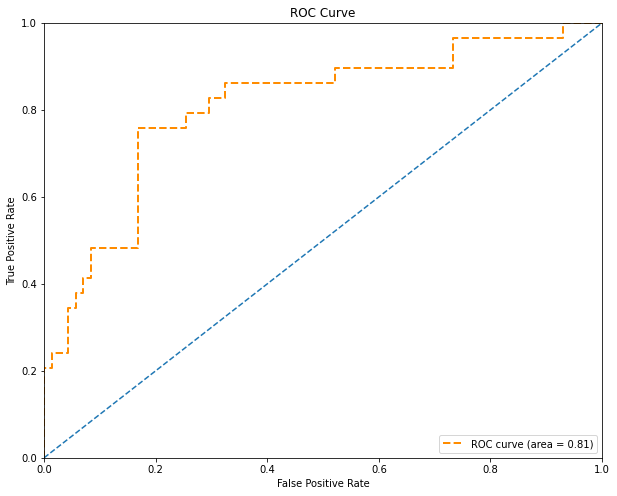

In [51]:
y_pred_prob_test = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

## **Feature Selected model**

In [52]:
feature_set1 = features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)
feature_set1

FeatureName  Random Forest Feature Importance
10               other_debtors                          0.137938
4                      purpose                          0.109448
16           credits_this_bank                          0.101694
1         account_check_status                          0.092645
5                credit_amount                          0.064194
7            present_emp_since                          0.063179
19                   telephone                          0.050622
8   installment_as_income_perc                          0.045372
18    people_under_maintenance                          0.045265
14     other_installment_plans                          0.045074
13                         age                          0.042106
2            duration_in_month                          0.037408
12                    property                          0.031547
17                         job                          0.029485
15                     housing                          0.026366
11           present_res_since                          0.022452
3               credit_history                          0.019576
6                      savings                          0.018190
0                      default                          0.012968
9          personal_status_sex                          0.004474

In [53]:
features_selected = feature_set1['FeatureName'].head(10)
features_selected.values

array(['other_debtors', 'purpose', 'credits_this_bank',
       'account_check_status', 'credit_amount', 'present_emp_since',
       'telephone', 'installment_as_income_perc',
       'people_under_maintenance', 'other_installment_plans'],
      dtype=object)

In [54]:
features_selected_2 = ['credits_this_bank','present_emp_since', 'purpose',
       'present_res_since', 'installment_as_income_perc',
       'credit_history', 'other_installment_plans', 'duration_in_month']
features_selected_2

['credits_this_bank',
 'present_emp_since',
 'purpose',
 'present_res_since',
 'installment_as_income_perc',
 'credit_history',
 'other_installment_plans',
 'duration_in_month']

In [55]:
data_3 = data[features_selected_2]
data_3['default'] = data['default']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
data_3

credits_this_bank  present_emp_since  purpose  present_res_since  \
0                    2                  5        4                  4   
1                    1                  3        4                  2   
2                    1                  4        7                  3   
3                    1                  4        3                  4   
4                    2                  3        0                  4   
..                 ...                ...      ...                ...   
995                  1                  4        3                  4   
996                  1                  3        1                  4   
997                  1                  5        4                  4   
998                  1                  3        4                  4   
999                  1                  1        1                  4   

     installment_as_income_perc  credit_history  other_installment_plans  \
0                             4               4                        3   
1                             2               2                        3   
2                             2               4                        3   
3                             2               2                        3   
4                             3               3                        3   
..                          ...             ...                      ...   
995                           3               2                        3   
996                           4               2                        3   
997                           4               2                        3   
998                           4               2                        3   
999                           3               4                        3   

     duration_in_month  default  
0                    6        0  
1                   48        1  
2                   12        0  
3                   42        0  
4                   24        1  
..                 ...      ...  
995                 12        0  
996                 30        0  
997                 12        0  
998                 45        1  
999                 45        0  

[1000 rows x 9 columns]

In [57]:
target = ['default']
features = list(set(list(data_3.columns)) - set(target))

In [58]:
X = data_3[features]
y = data_3[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [59]:
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[68  3]
 [19 10]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        71
           1       0.77      0.34      0.48        29

    accuracy                           0.78       100
   macro avg       0.78      0.65      0.67       100
weighted avg       0.78      0.78      0.75       100

Logistic Regression accuracy:  0.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [60]:
data['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

## **Resampling**

In [61]:
!pip install imbalanced-learn

In [62]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


#### **1. Over sampling**

In [63]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [64]:
X_train

credit_history  installment_as_income_perc  credits_this_bank  \
716               4                           3                  2   
351               2                           1                  1   
936               2                           3                  1   
256               4                           4                  2   
635               2                           4                  3   
..              ...                         ...                ...   
106               1                           2                  2   
270               2                           4                  1   
860               4                           4                  2   
435               2                           2                  1   
102               3                           3                  1   

     duration_in_month  present_res_since  other_installment_plans  \
716                 30                  2                        3   
351                  9                  2                        3   
936                  9                  2                        3   
256                 24                  2                        3   
635                 12                  4                        1   
..                 ...                ...                      ...   
106                 18                  4                        1   
270                 18                  3                        3   
860                 24                  2                        3   
435                 12                  1                        3   
102                  6                  2                        3   

     present_emp_since  purpose  
716                  5        4  
351                  3        3  
936                  3        4  
256                  3        4  
635                  5        7  
..                 ...      ...  
106                  5        0  
270                  4        0  
860                  3        1  
435                  3        4  
102                  3        4  

[900 rows x 8 columns]

In [65]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [66]:
X_train_over

credit_history  installment_as_income_perc  credits_this_bank  \
0                  4                           3                  2   
1                  2                           1                  1   
2                  2                           3                  1   
3                  4                           4                  2   
4                  2                           4                  3   
...              ...                         ...                ...   
1253               0                           4                  1   
1254               2                           2                  1   
1255               2                           4                  1   
1256               2                           1                  1   
1257               4                           2                  2   

      duration_in_month  present_res_since  other_installment_plans  \
0                    30                  2                        3   
1                     9                  2                        3   
2                     9                  2                        3   
3                    24                  2                        3   
4                    12                  4                        1   
...                 ...                ...                      ...   
1253                 36                  4                        3   
1254                 12                  3                        3   
1255                 36                  4                        2   
1256                  9                  2                        3   
1257                  9                  3                        3   

      present_emp_since  purpose  
0                     5        4  
1                     3        3  
2                     3        4  
3                     3        4  
4                     5        7  
...                 ...      ...  
1253                  5        9  
1254                  4        0  
1255                  3        7  
1256                  3        3  
1257                  5        7  

[1258 rows x 8 columns]

In [67]:
y_train_over

default
0           0
1           1
2           1
3           0
4           0
...       ...
1253        1
1254        1
1255        1
1256        1
1257        1

[1258 rows x 1 columns]

In [68]:
y_train_over.value_counts()

default
0          629
1          629
dtype: int64

In [69]:
print('Predict on over-sampling trainning set')
classifier = LogisticRegression()
classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred_train_over = classifier.predict(X_train_over)
print(confusion_matrix(y_train_over,y_pred_train_over))
print(classification_report(y_train_over,y_pred_train_over))
print('Logistic Regression accuracy: ', accuracy_score(y_train_over, y_pred_train_over))

Predict on over-sampling trainning set
[[415 214]
 [203 426]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       629
           1       0.67      0.68      0.67       629

    accuracy                           0.67      1258
   macro avg       0.67      0.67      0.67      1258
weighted avg       0.67      0.67      0.67      1258

Logistic Regression accuracy:  0.6685214626391097


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [70]:
print('Predict on testing set')
classifier = LogisticRegression()
classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

Predict on testing set
[[43 28]
 [10 19]]
              precision    recall  f1-score   support

           0       0.81      0.61      0.69        71
           1       0.40      0.66      0.50        29

    accuracy                           0.62       100
   macro avg       0.61      0.63      0.60       100
weighted avg       0.69      0.62      0.64       100

Logistic Regression accuracy:  0.62


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### **2. Under Sampling**

In [71]:
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [72]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [73]:
X_train_under

credit_history  installment_as_income_perc  credits_this_bank  \
0                 0                           4                  1   
1                 4                           1                  2   
2                 2                           2                  1   
3                 4                           2                  2   
4                 4                           2                  2   
..              ...                         ...                ...   
595               1                           2                  1   
596               4                           2                  1   
597               2                           3                  1   
598               2                           2                  1   
599               2                           4                  1   

     duration_in_month  present_res_since  other_installment_plans  \
0                    6                  1                        1   
1                   11                  2                        3   
2                   12                  2                        3   
3                   24                  4                        3   
4                   12                  3                        3   
..                 ...                ...                      ...   
595                 15                  2                        3   
596                 30                  2                        3   
597                 48                  2                        1   
598                 36                  2                        3   
599                 45                  4                        3   

     present_emp_since  purpose  
0                    3        0  
1                    3        0  
2                    3        4  
3                    3        9  
4                    4        0  
..                 ...      ...  
595                  3        0  
596                  4        3  
597                  1        9  
598                  3        1  
599                  3        4  

[600 rows x 8 columns]

In [74]:
y_train_under

default
0          0
1          0
2          0
3          0
4          0
..       ...
595        1
596        1
597        1
598        1
599        1

[600 rows x 1 columns]

In [75]:
y_train_under.value_counts()

default
0          300
1          300
dtype: int64

In [76]:
classifier = LogisticRegression()
classifier.fit(X_train_under.values, y_train_under.values.ravel())

y_pred_train_under = classifier.predict(X_train_under)
print(confusion_matrix(y_train_under,y_pred_train_under))
print(classification_report(y_train_under,y_pred_train_under))
print('Logistic Regression accuracy: ', accuracy_score(y_train_under, y_pred_train_under))

[[210  90]
 [100 200]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       300
           1       0.69      0.67      0.68       300

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.68      0.68      0.68       600

Logistic Regression accuracy:  0.6833333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [77]:
classifier.fit(X_train_under.values, y_train_under.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[42 29]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.82      0.59      0.69        71
           1       0.41      0.69      0.51        29

    accuracy                           0.62       100
   macro avg       0.62      0.64      0.60       100
weighted avg       0.70      0.62      0.64       100

Logistic Regression accuracy:  0.62


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### **Predict new customer (sample on original data)**

In [78]:
target = ['default']
features = list(set(list(data.columns)) - set(target))

In [79]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [80]:
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [81]:
import random
random_number = random.randrange(0, 100, 1)
random_number

24

In [82]:
X_test.columns

Index(['people_under_maintenance', 'duration_in_month', 'personal_status_sex',
       'other_debtors', 'age', 'purpose', 'telephone', 'credit_history',
       'installment_as_income_perc', 'foreign_worker', 'credit_amount',
       'credits_this_bank', 'job', 'present_res_since', 'savings',
       'other_installment_plans', 'account_check_status', 'housing',
       'property', 'present_emp_since'],
      dtype='object')

In [83]:
sample_test = X_test.iloc[random_number].values
sample_test = sample_test.tolist()
sample_test

[2, 9, 3, 1, 33, 4, 1, 4, 1, 1, 3074, 2, 3, 2, 5, 3, 4, 2, 1, 3]

In [84]:
sample_test = [2, 1, 2, 2760, 1, 5, 4, 5, 24, 3, 36, 3, 1, 4, 4, 3, 1, 1, 1, 2]

In [85]:
print(classifier.predict([sample_test]))

[0]


# **4-class classification**
- **1: Không có rủi ro**
- **2: Rủi ro trả nợ trễ kỳ (chậm trả 10 ngày)**
- **3: Rủi ro quá hạn**
- **4: Rủi ro không trả được nợ (mất khả năng trả nợ)**

### **1. Import dữ liệu**

In [86]:
data_4_class = pd.read_csv(path + "/german_credit_categori.csv")

In [87]:
data_4_class = data_4_class.drop(columns=['defaut_1', 'Unnamed: 5'])

In [88]:
data_4_class = data_4_class.rename(columns={"default_2": "default"})

In [89]:
data_4_class['default'].value_counts()

2    345
1    343
3    240
4     72
Name: default, dtype: int64

In [90]:
data_4_class

default  account_check_status  duration_in_month  credit_history  \
0          2                     1                  6               4   
1          3                     2                 48               2   
2          2                     4                 12               4   
3          1                     1                 42               2   
4          3                     1                 24               3   
..       ...                   ...                ...             ...   
995        1                     4                 12               2   
996        1                     1                 30               2   
997        1                     4                 12               2   
998        3                     1                 45               2   
999        2                     2                 45               4   

     purpose  credit_amount  savings  present_emp_since  \
0          4           1169        5                  5   
1          4           5951        1                  3   
2          7           2096        1                  4   
3          3           7882        1                  4   
4          0           4870        1                  3   
..       ...            ...      ...                ...   
995        3           1736        1                  4   
996        1           3857        1                  3   
997        4            804        1                  5   
998        4           1845        1                  3   
999        1           4576        2                  1   

     installment_as_income_perc  personal_status_sex  ...  present_res_since  \
0                             4                    3  ...                  4   
1                             2                    2  ...                  2   
2                             2                    3  ...                  3   
3                             2                    3  ...                  4   
4                             3                    3  ...                  4   
..                          ...                  ...  ...                ...   
995                           3                    2  ...                  4   
996                           4                    1  ...                  4   
997                           4                    3  ...                  4   
998                           4                    3  ...                  4   
999                           3                    3  ...                  4   

     property  age  other_installment_plans  housing  credits_this_bank  job  \
0           1   67                        3        2                  2    3   
1           1   22                        3        2                  1    3   
2           1   49                        3        2                  1    2   
3           2   45                        3        3                  1    3   
4           4   53                        3        3                  2    3   
..        ...  ...                      ...      ...                ...  ...   
995         1   31                        3        2                  1    2   
996         2   40                        3        2                  1    4   
997         3   38                        3        2                  1    3   
998         4   23                        3        3                  1    3   
999         3   27                        3        2                  1    3   

     people_under_maintenance  telephone  foreign_worker  
0                           1          2               1  
1                           1          1               1  
2                           2          1               1  
3                           2          1               1  
4                           2          1               1  
..                        ...        ...             ...  
995                         1          1               1  
996                      

### **2. Thống kê mô tả**

In [91]:
from copy import deepcopy
data_4_class_2 = deepcopy(data_4_class) 

In [92]:
data_4_class_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

In [93]:
for col in categorical_features:
    data_4_class_2[col] = data_4_class_2[col].astype('object')

In [94]:
data_4_class_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [95]:
data_4_class_2[numerical_features].describe()

duration_in_month  credit_amount  installment_as_income_perc  \
count        1000.000000    1000.000000                 1000.000000   
mean           20.903000    3271.258000                    2.973000   
std            12.058814    2822.736876                    1.118715   
min             4.000000     250.000000                    1.000000   
25%            12.000000    1365.500000                    2.000000   
50%            18.000000    2319.500000                    3.000000   
75%            24.000000    3972.250000                    4.000000   
max            72.000000   18424.000000                    4.000000   

       present_res_since          age  credits_this_bank  \
count        1000.000000  1000.000000        1000.000000   
mean            2.845000    35.546000           1.407000   
std             1.103718    11.375469           0.577654   
min             1.000000    19.000000           1.000000   
25%             2.000000    27.000000           1.000000   
50%             3.000000    33.000000           1.000000   
75%             4.000000    42.000000           2.000000   
max             4.000000    75.000000           4.000000   

       people_under_maintenance  
count               1000.000000  
mean                   1.155000  
std                    0.362086  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%                    1.000000  
max                    2.000000

In [96]:
data_4_class_2[categorical_features].describe()

account_check_status  credit_history  purpose  savings  \
count                   1000            1000     1000     1000   
unique                     4               5       10        5   
top                        4               2        4        1   
freq                     394             530      280      603   

        present_emp_since  personal_status_sex  other_debtors  property  \
count                1000                 1000           1000      1000   
unique                  5                    4              3         4   
top                     3                    3              1         3   
freq                  339                  548            907       332   

        other_installment_plans  housing   job  telephone  foreign_worker  
count                      1000     1000  1000       1000            1000  
unique                        3        3     4          2               2  
top                           3        2     3          1               1  
freq                        814      713   630        596             963

### **3. Correlation**

In [97]:
data_4_class.corr()

default  account_check_status  duration_in_month  \
default                     1.000000             -0.250560           0.163288   
account_check_status       -0.250560              1.000000          -0.072013   
duration_in_month           0.163288             -0.072013           1.000000   
credit_history              0.138359              0.192191          -0.077186   
purpose                     0.000252              0.053223           0.096027   
credit_amount               0.153117             -0.042705           0.624984   
savings                    -0.160486              0.222867           0.047661   
present_emp_since          -0.045953              0.106339           0.057381   
installment_as_income_perc  0.049981             -0.005280           0.074749   
personal_status_sex        -0.051468              0.043261           0.014789   
other_debtors              -0.044802             -0.127737          -0.024490   
present_res_since           0.023679             -0.042234           0.034067   
property                    0.115789             -0.032260           0.303971   
age                        -0.020789              0.059751          -0.036136   
other_installment_plans    -0.080107              0.046841          -0.054884   
housing                     0.005880              0.022424           0.157049   
credits_this_bank           0.221640              0.076005          -0.011284   
job                         0.022879              0.040663           0.210910   
people_under_maintenance    0.019693             -0.014145          -0.023834   
telephone                  -0.025276              0.066296           0.164718   
foreign_worker             -0.071121             -0.026758          -0.138196   

                            credit_history   purpose  credit_amount   savings  \
default                           0.138359  0.000252       0.153117 -0.160486   
account_check_status              0.192191  0.053223      -0.042705  0.222867   
duration_in_month                -0.077186  0.096027       0.624984  0.047661   
credit_history                    1.000000 -0.081634      -0.059905  0.039058   
purpose                          -0.081634  1.000000      -0.030848 -0.024072   
credit_amount                    -0.059905 -0.030848       1.000000  0.064630   
savings                           0.039058 -0.024072       0.064630  1.000000   
present_emp_since                 0.138225  0.024990      -0.008367  0.120950   
installment_as_income_perc        0.044375  0.078224      -0.271316  0.021993   
personal_status_sex               0.042171 -0.003052      -0.016091  0.017349   
other_debtors                    -0.040676 -0.032254      -0.027832 -0.105069   
present_res_since                 0.063198 -0.062927       0.028926  0.091424   
property                         -0.053777 -0.031025       0.311599  0.018948   
age                               0.147086 -0.030654       0.032716  0.084245   
other_installment_plans           0.121973 -0.039346      -0.046008  0.001908   
housing                           0.062095 -0.019488       0.135632  0.006505   
credits_this_bank                 0.437066  0.034958       0.020795 -0.021644   
job                               0.010350 -0.032655       0.285385  0.011709   
people_under_maintenance          0.011550 -0.056450       0.017142  0.027514   
telephone                         0.052370  0.018677       0.276995  0.087208   
foreign_worker                    0.013873 -0.124317      -0.050050  0.007095   

                            present_emp_since  installment_as_income_perc  \
default                             -0.045953                    0.049981   
account_check_status                 0.106339                   -0.005280   
duration_in_month                    0.057381                    0.074749   
credit_history                       0.138225                    0.044375   
purpose                              0.024990                    0.078224   
c

In [98]:
pd.DataFrame(data_4_class.corr().iloc[1:,0])

default
account_check_status       -0.250560
duration_in_month           0.163288
credit_history              0.138359
purpose                     0.000252
credit_amount               0.153117
savings                    -0.160486
present_emp_since          -0.045953
installment_as_income_perc  0.049981
personal_status_sex        -0.051468
other_debtors              -0.044802
present_res_since           0.023679
property                    0.115789
age                        -0.020789
other_installment_plans    -0.080107
housing                     0.005880
credits_this_bank           0.221640
job                         0.022879
people_under_maintenance    0.019693
telephone                  -0.025276
foreign_worker             -0.071121

In [99]:
correlation_2 = data_4_class.corr().iloc[1:,0].values

In [100]:
features_importances_corr = pd.DataFrame({'FeatureName': data_4_class[column_selected].columns[0:len(data_4_class[column_selected])-1], 'Pearson Correlation with target': correlation_2})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

FeatureName  Pearson Correlation with target
0         account_check_status                        -0.250560
15           credits_this_bank                         0.221640
1            duration_in_month                         0.163288
5                      savings                        -0.160486
4                credit_amount                         0.153117
2               credit_history                         0.138359
11                    property                         0.115789
13     other_installment_plans                        -0.080107
19              foreign_worker                        -0.071121
8          personal_status_sex                        -0.051468
7   installment_as_income_perc                         0.049981
6            present_emp_since                        -0.045953
9                other_debtors                        -0.044802
18                   telephone                        -0.025276
10           present_res_since                         0.023679
16                         job                         0.022879
12                         age                        -0.020789
17    people_under_maintenance                         0.019693
14                     housing                         0.005880
3                      purpose                         0.000252

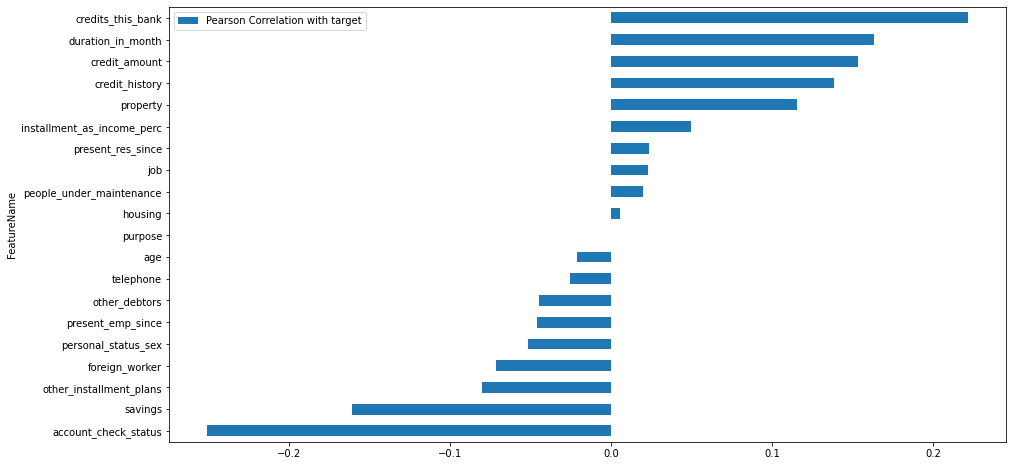

In [101]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

### **4. Random Forest Feature Importance**

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [103]:
target = ['default']
features = list(set(list(data_4_class.columns)) - set(target))

In [104]:
print('Target: ', target)
print('Features: ', features)

Target:  ['default']
Features:  ['people_under_maintenance', 'duration_in_month', 'personal_status_sex', 'other_debtors', 'age', 'purpose', 'telephone', 'credit_history', 'installment_as_income_perc', 'foreign_worker', 'credit_amount', 'credits_this_bank', 'job', 'present_res_since', 'savings', 'other_installment_plans', 'account_check_status', 'housing', 'property', 'present_emp_since']


In [105]:
X = data_4_class[features].values
y = data_4_class[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

***a. Prediction***

In [106]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[27  2 10  0]
 [ 0 31  0  0]
 [ 5  3 14  0]
 [ 1  5  1  1]]
              precision    recall  f1-score   support

           1       0.82      0.69      0.75        39
           2       0.76      1.00      0.86        31
           3       0.56      0.64      0.60        22
           4       1.00      0.12      0.22         8

    accuracy                           0.73       100
   macro avg       0.78      0.61      0.61       100
weighted avg       0.76      0.73      0.71       100

Random Forest accuracy:  0.73


***b. Feature Importance***

In [107]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

FeatureName  Random Forest Feature Importance
7            present_emp_since                          0.269864
10               other_debtors                          0.095528
1         account_check_status                          0.088216
4                      purpose                          0.077167
16           credits_this_bank                          0.059811
11           present_res_since                          0.054199
5                credit_amount                          0.047695
19                   telephone                          0.037732
18    people_under_maintenance                          0.035227
8   installment_as_income_perc                          0.032081
14     other_installment_plans                          0.030981
13                         age                          0.030594
2            duration_in_month                          0.029027
12                    property                          0.025301
17                         job                          0.020666
15                     housing                          0.020336
3               credit_history                          0.017327
6                      savings                          0.014459
0                      default                          0.010870
9          personal_status_sex                          0.002920

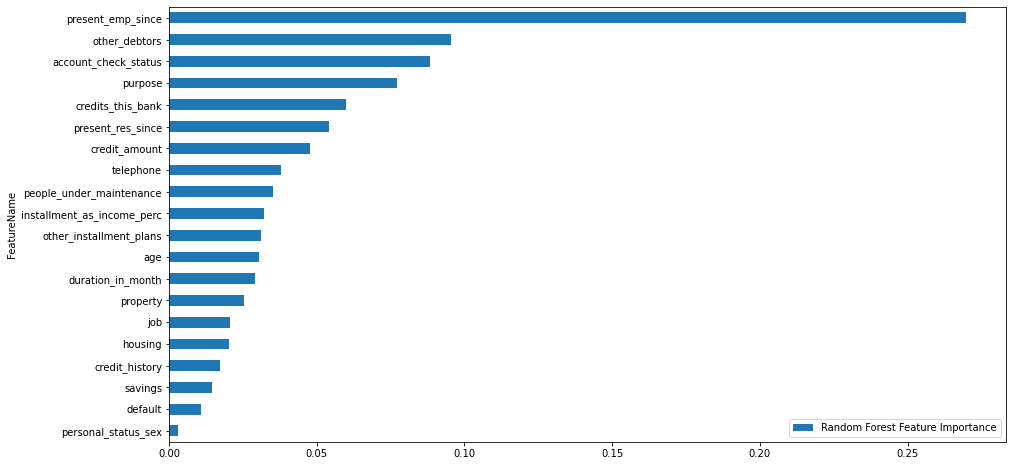

In [108]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

***c. ROC Curve***

In [109]:
# y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
# fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
# roc_auc = auc(fpr, tpr)

# _plot_roc_curve(fpr, tpr, thres, roc_auc)

In [110]:
# y_prob = classifier.predict_proba(X_test)

# macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
# weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
# macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
# weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

# print(
#     "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
#     "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
# )
# print(
#     "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
#     "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
# )

### **5.Logistic Regression**

**a. Prediction**

In [111]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(multi_class='multinomial')
LR_classifier.fit(X_train, y_train.ravel())

y_pred = LR_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[20 16  3  0]
 [ 8 18  5  0]
 [12  3  7  0]
 [ 2  3  3  0]]
              precision    recall  f1-score   support

           1       0.48      0.51      0.49        39
           2       0.45      0.58      0.51        31
           3       0.39      0.32      0.35        22
           4       0.00      0.00      0.00         8

    accuracy                           0.45       100
   macro avg       0.33      0.35      0.34       100
weighted avg       0.41      0.45      0.43       100

Logistic Regression accuracy:  0.45


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [112]:
df_report_2 = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':y_pred.ravel()})
df_report_2

Ground Truth  Prediction
0              3           1
1              1           2
2              1           1
3              1           1
4              2           1
..           ...         ...
95             2           2
96             2           1
97             1           1
98             4           3
99             4           2

[100 rows x 2 columns]

In [113]:
df_report.to_excel(r'gdrive/My Drive/0320 - Credit Scoring Book demo/predicted 4 classes.xlsx', index=False)

**b. Feature Importance**

In [114]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data_4_class.columns[0:len(data_4_class.columns)-1], 'Logistic Regression Feature Importance': importance_lr})
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

FeatureName  Logistic Regression Feature Importance
7            present_emp_since                               -0.019506
14     other_installment_plans                                0.012550
16           credits_this_bank                                0.011750
4                      purpose                                0.011432
1         account_check_status                                0.009747
11           present_res_since                               -0.009160
15                     housing                                0.005971
12                    property                                0.005476
2            duration_in_month                                0.004778
5                credit_amount                                0.004508
3               credit_history                                0.004504
19                   telephone                                0.003650
17                         job                                0.003209
6                      savings                                0.003161
8   installment_as_income_perc                                0.002597
9          personal_status_sex                                0.002338
13                         age                                0.001865
18    people_under_maintenance                                0.001363
0                      default                                0.001235
10               other_debtors                               -0.000056

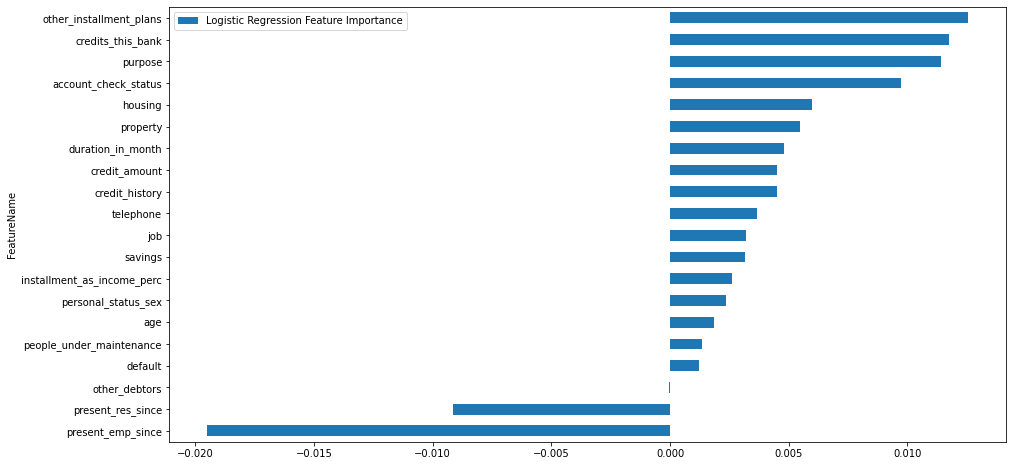

In [115]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

### **6. Decision Tree Classifier**

**a. Predection**

In [116]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[27  2 10  0]
 [ 2 23  2  4]
 [10  2 10  0]
 [ 1  4  0  3]]
              precision    recall  f1-score   support

           1       0.68      0.69      0.68        39
           2       0.74      0.74      0.74        31
           3       0.45      0.45      0.45        22
           4       0.43      0.38      0.40         8

    accuracy                           0.63       100
   macro avg       0.58      0.57      0.57       100
weighted avg       0.63      0.63      0.63       100

Decision Tree accuracy:  0.63


**b. Feature Importance**

In [117]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

FeatureName  Decision Tree Feature Importance
7            present_emp_since                          0.347780
10               other_debtors                          0.102396
1         account_check_status                          0.091398
4                      purpose                          0.079580
16           credits_this_bank                          0.073627
5                credit_amount                          0.045589
19                   telephone                          0.034779
13                         age                          0.034312
18    people_under_maintenance                          0.032565
2            duration_in_month                          0.028001
12                    property                          0.021765
15                     housing                          0.020760
14     other_installment_plans                          0.018375
17                         job                          0.014001
3               credit_history                          0.012603
11           present_res_since                          0.011368
8   installment_as_income_perc                          0.009526
6                      savings                          0.009400
0                      default                          0.008375
9          personal_status_sex                          0.003799

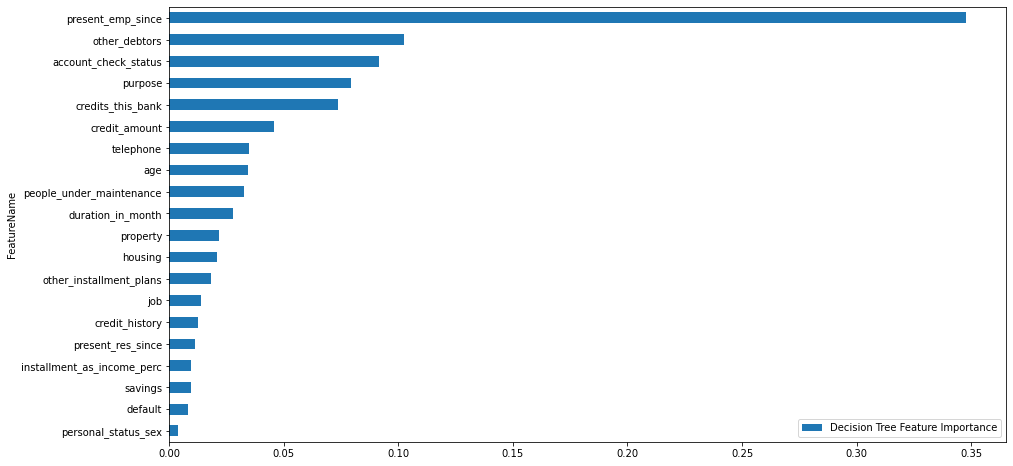

In [118]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

**c. Plot tree**

In [119]:
X_plot_tree_2 = data_4_class[features]

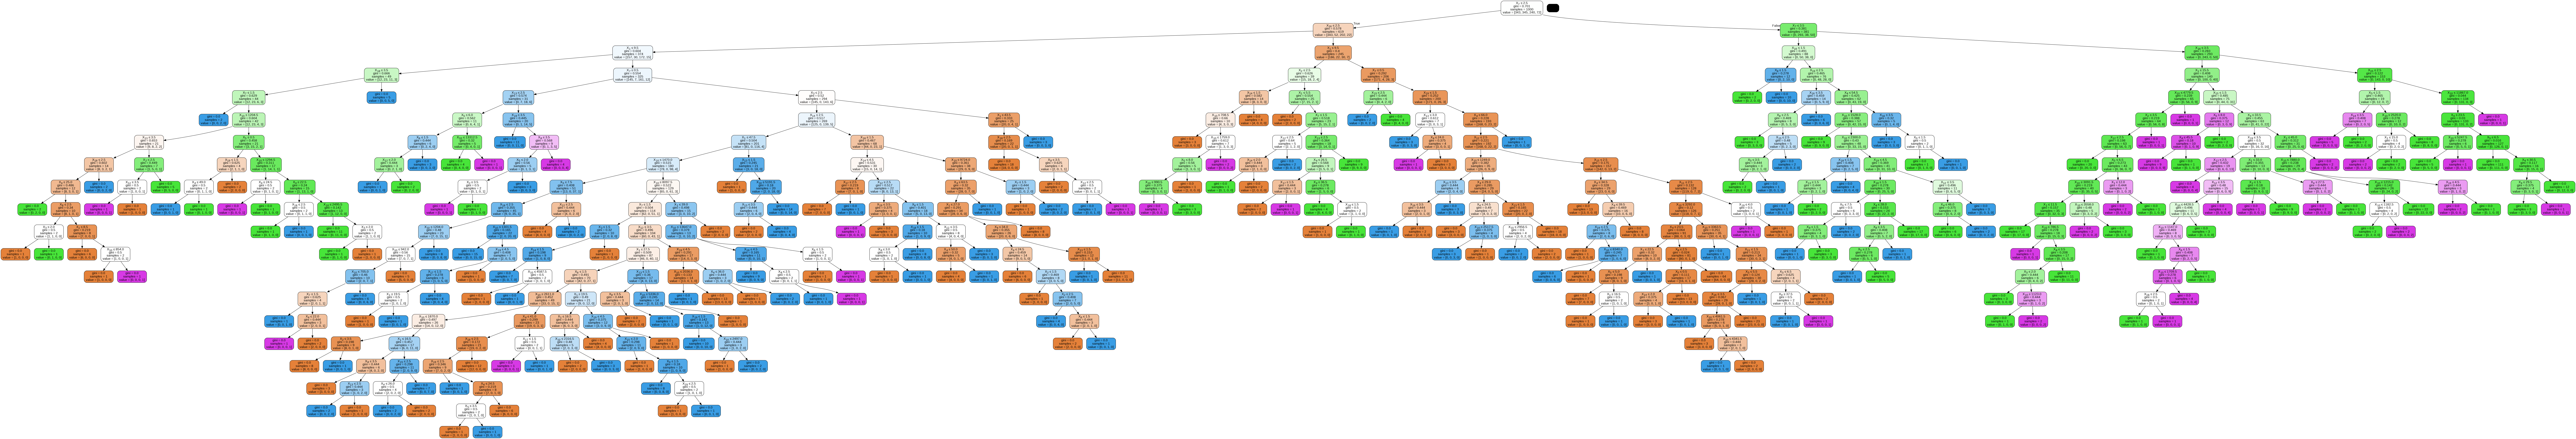

In [120]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree_2.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [121]:
for i in range(len(X_plot_tree_2.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree_2.columns[i])

X_0: people_under_maintenance
X_1: duration_in_month
X_2: personal_status_sex
X_3: other_debtors
X_4: age
X_5: purpose
X_6: telephone
X_7: credit_history
X_8: installment_as_income_perc
X_9: foreign_worker
X_10: credit_amount
X_11: credits_this_bank
X_12: job
X_13: present_res_since
X_14: savings
X_15: other_installment_plans
X_16: account_check_status
X_17: housing
X_18: property
X_19: present_emp_since


### **7. XGB Classifier** 

**a. Prediction**

In [122]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[27  3  9  0]
 [ 0 28  3  0]
 [ 6  1 15  0]
 [ 0  6  1  1]]
              precision    recall  f1-score   support

           1       0.82      0.69      0.75        39
           2       0.74      0.90      0.81        31
           3       0.54      0.68      0.60        22
           4       1.00      0.12      0.22         8

    accuracy                           0.71       100
   macro avg       0.77      0.60      0.60       100
weighted avg       0.75      0.71      0.69       100

XGBoost accuracy:  0.71


**b. Feature Importance**

In [123]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

FeatureName  XGBoost Feature Importance
7            present_emp_since                    0.251791
16           credits_this_bank                    0.110808
1         account_check_status                    0.087533
3               credit_history                    0.046493
15                     housing                    0.043334
19                   telephone                    0.042564
14     other_installment_plans                    0.041673
5                credit_amount                    0.036752
10               other_debtors                    0.035032
11           present_res_since                    0.034068
18    people_under_maintenance                    0.033314
2            duration_in_month                    0.029109
0                      default                    0.029067
17                         job                    0.028391
6                      savings                    0.027963
4                      purpose                    0.027848
8   installment_as_income_perc                    0.026209
12                    property                    0.026071
13                         age                    0.021346
9          personal_status_sex                    0.020637

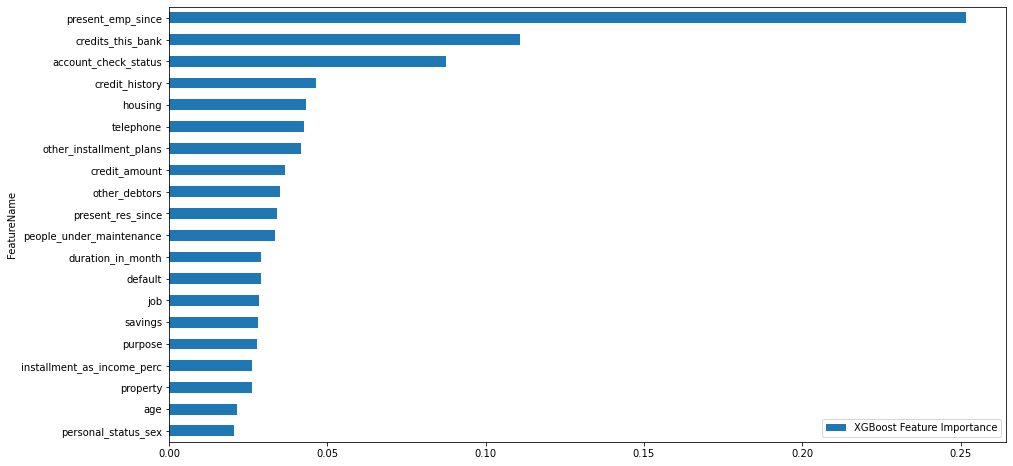

In [124]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

### **8. Ada Boost Classifier**

**a. Prediction**

In [125]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())

y_pred = ada_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[15  3 19  2]
 [ 0  8 19  4]
 [ 5  0 17  0]
 [ 1  0  6  1]]
              precision    recall  f1-score   support

           1       0.71      0.38      0.50        39
           2       0.73      0.26      0.38        31
           3       0.28      0.77      0.41        22
           4       0.14      0.12      0.13         8

    accuracy                           0.41       100
   macro avg       0.47      0.39      0.36       100
weighted avg       0.58      0.41      0.41       100

XGBoost accuracy:  0.41


**b. Feature Importance**

In [126]:
importance_ada = ada_classifier.feature_importances_
features_importances_ada = pd.DataFrame({'FeatureName': data.columns[0:len(data.columns)-1], 'AdaBoost Feature Importance': importance_ada})
features_importances_ada.sort_values(by=['AdaBoost Feature Importance'], ascending=False)

FeatureName  AdaBoost Feature Importance
7            present_emp_since                         0.24
1         account_check_status                         0.24
10               other_debtors                         0.10
18    people_under_maintenance                         0.08
4                      purpose                         0.08
2            duration_in_month                         0.04
5                credit_amount                         0.04
6                      savings                         0.04
16           credits_this_bank                         0.04
13                         age                         0.02
17                         job                         0.02
19                   telephone                         0.02
9          personal_status_sex                         0.02
8   installment_as_income_perc                         0.02
12                    property                         0.00
11           present_res_since                         0.00
14     other_installment_plans                         0.00
15                     housing                         0.00
3               credit_history                         0.00
0                      default                         0.00

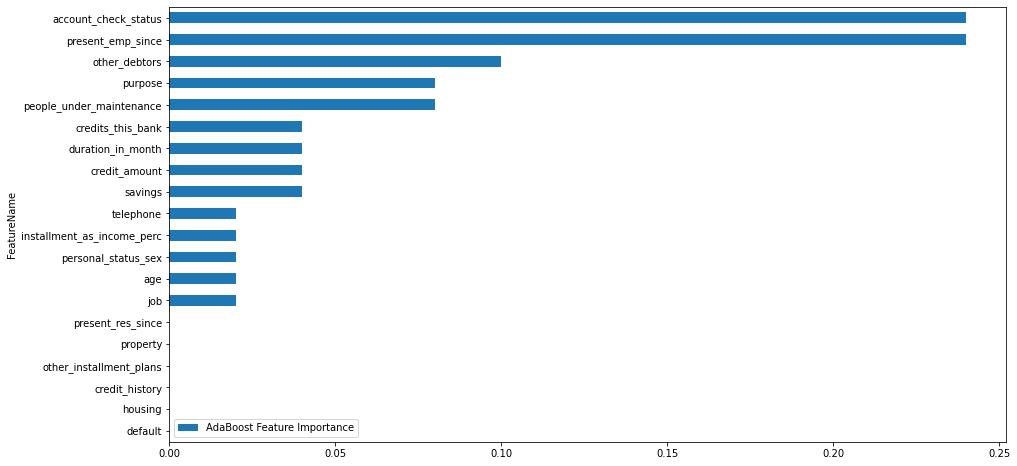

In [127]:
features_importances_ada.sort_values("AdaBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["AdaBoost Feature Importance"], kind="barh")

## **Resampling**

In [128]:
X = data_4_class[features]
y = data_4_class[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

#### **1. Over sampling**

In [129]:
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [130]:
X_train_over

people_under_maintenance  duration_in_month  personal_status_sex  \
0                            2                 30                    3   
1                            1                  9                    2   
2                            1                  9                    2   
3                            1                 24                    3   
4                            2                 12                    3   
...                        ...                ...                  ...   
1145                         1                  9                    3   
1146                         1                 48                    2   
1147                         1                 27                    3   
1148                         1                 18                    2   
1149                         1                 12                    3   

      other_debtors  age  purpose  telephone  credit_history  \
0                 1   40        4          2               4   
1                 1   29        3          1               2   
2                 1   28        4          1               2   
3                 1   35        4          1               4   
4                 1   47        7          2               2   
...             ...  ...      ...        ...             ...   
1145              1   22        4          1               2   
1146              1   24        1          1               4   
1147              1   23        4          1               4   
1148              2   22        4          1               2   
1149              1   35        0          1               4   

      installment_as_income_perc  foreign_worker  credit_amount  \
0                              3               1           3077   
1                              1               2            959   
2                              3               1            745   
3                              4               1           2684   
4                              4               1           1393   
...                          ...             ...            ...   
1145                           4               1           1478   
1146                           2               1          11590   
1147                           4               1           2520   
1148                           3               1            433   
1149                           4               1            691   

      credits_this_bank  job  present_res_since  savings  \
0                     2    3                  2        5   
1                     1    3                  2        1   
2                     1    2                  2        1   
3                     2    2                  2        1   
4                     3    3                  4        1   
...                 ...  ...                ...      ...   
1145                  1    3                  2        1   
1146                  2    2                  4        2   
1147                  2    2                  2        3   
1148                  1    3                  4        1   
1149                  2    3                  3        1   

      other_installment_plans  account_check_status  housing  property  \
0                           3                     4        2         3   
1                           3                     2        2         3   
2                           3                     3        2         1   
3                           3                     4        2         1   
4                           1                     4        2         2   
...                       ...                   ...      ...       ...   
1145                        3                     4        2         3   
1146                        1                     4        1         3   
1147                        3                     2        2         2   
1148                        3                     4        1         1   
1149    

In [131]:
y_train_over

default
0           2
1           3
2           4
3           2
4           1
...       ...
1145        4
1146        4
1147        4
1148        4
1149        4

[1150 rows x 1 columns]

In [132]:
y_train_over.value_counts()

default
2          314
4          314
1          304
3          218
dtype: int64

In [133]:
print('Predict on testing set')
classifier = LogisticRegression()
classifier.fit(X_train_over.values, y_train_over.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

Predict on testing set
[[20 14  1  4]
 [ 8 15  3  5]
 [ 9  2  5  6]
 [ 2  2  1  3]]
              precision    recall  f1-score   support

           1       0.51      0.51      0.51        39
           2       0.45      0.48      0.47        31
           3       0.50      0.23      0.31        22
           4       0.17      0.38      0.23         8

    accuracy                           0.43       100
   macro avg       0.41      0.40      0.38       100
weighted avg       0.46      0.43      0.43       100

Logistic Regression accuracy:  0.43


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#### **2. Under Sampling**

In [134]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X, y)

In [135]:
X_train_under

people_under_maintenance  duration_in_month  personal_status_sex  \
0                           2                 42                    3   
1                           2                 36                    3   
2                           1                 24                    3   
3                           1                 36                    3   
4                           1                 12                    1   
..                        ...                ...                  ...   
722                         1                 16                    3   
723                         1                 24                    2   
724                         1                  9                    2   
725                         1                 27                    3   
726                         1                 30                    3   

     other_debtors  age  purpose  telephone  credit_history  \
0                3   45        3          1               2   
1                1   35        7          2               2   
2                1   53        3          1               2   
3                1   35        1          2               2   
4                1   61        4          1               2   
..             ...  ...      ...        ...             ...   
722              3   43        0          2               4   
723              1   25        3          1               4   
724              1   28        4          1               2   
725              1   23        4          1               4   
726              1   49        3          1               4   

     installment_as_income_perc  foreign_worker  credit_amount  \
0                             2               1           7882   
1                             2               1           9055   
2                             3               1           2835   
3                             2               1           6948   
4                             2               1           3059   
..                          ...             ...            ...   
722                           2               1           2625   
723                           2               1           4736   
724                           3               1            745   
725                           4               1           2520   
726                           2               1           8386   

     credits_this_bank  job  present_res_since  savings  \
0                    1    3                  4        1   
1                    1    2                  4        5   
2                    1    3                  4        3   
3                    1    4                  2        1   
4                    1    2                  4        4   
..                 ...  ...                ...      ...   
722                  1    3                  4        1   
723                  1    2                  4        1   
724                  1    2                  2        1   
725                  2    2                  2        3   
726                  1    3                  2        1   

     other_installment_plans  account_check_status  housing  property  \
0                          3                     1        3         2   
1                          3                     4        3         4   
2                          3                     4        2         2   
3                          3                     2        1         3   
4                          3                     4        2         1   
..                       ...                   ...      ...       ...   
722                        1                     1        1         2   
723                        1                     2        2         3   
724                        3                     3        2         1   
725                        3                     2        2         2   
726                        3                     2        2       

In [136]:
y_train_under

default
0          1
1          1
2          1
3          1
4          1
..       ...
722        4
723        4
724        4
725        4
726        4

[727 rows x 1 columns]

In [137]:
classifier.fit(X_train_under.values, y_train_under.values.ravel())

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred))

[[35  0  4  0]
 [23  1  7  0]
 [13  0  9  0]
 [ 5  0  3  0]]
              precision    recall  f1-score   support

           1       0.46      0.90      0.61        39
           2       1.00      0.03      0.06        31
           3       0.39      0.41      0.40        22
           4       0.00      0.00      0.00         8

    accuracy                           0.45       100
   macro avg       0.46      0.33      0.27       100
weighted avg       0.58      0.45      0.34       100

Logistic Regression accuracy:  0.45


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

#### **Predict new borrower**

In [138]:
target = ['default']
features = list(set(list(data_4_class.columns)) - set(target))

In [139]:
X = data_4_class[features]
y = data_4_class[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [140]:
classifier = LogisticRegression()
classifier.fit(X_train.values, y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [141]:
import random
random = random.randrange(0, 100, 1)
random

83

In [142]:
X_test.columns

Index(['people_under_maintenance', 'duration_in_month', 'personal_status_sex',
       'other_debtors', 'age', 'purpose', 'telephone', 'credit_history',
       'installment_as_income_perc', 'foreign_worker', 'credit_amount',
       'credits_this_bank', 'job', 'present_res_since', 'savings',
       'other_installment_plans', 'account_check_status', 'housing',
       'property', 'present_emp_since'],
      dtype='object')

In [143]:
sample_test = [2, 1, 2, 2760, 1, 5, 4, 5, 24, 3, 36, 3, 1, 4, 4, 3, 1, 1, 1, 2]

In [144]:
sample_test = X_test.iloc[random].values
sample_test = sample_test.tolist()
sample_test

[1, 12, 4, 1, 22, 0, 1, 2, 4, 1, 1007, 1, 3, 1, 4, 3, 2, 2, 1, 3]

In [145]:
print(classifier.predict([sample_test]))

[1]
